In [42]:
%matplotlib inline
from skimage.io import imread, imshow
import numpy as np
from scipy.signal.windows import gaussian
import scipy.fftpack as fp
from numpy import clip
import matplotlib.pyplot as plt

# TASK 1

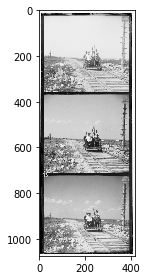

In [43]:
a=imread('img.png')
imshow(a)

In [45]:
s=float(input())
n=int(input())

5
6


# TASK 2

In [46]:
def PyGauss(img,sigma,n_layers):
     n_points = 2 * round(sigma * 3) + 1
     kernel = np.outer(gaussian(n_points, std=sigma), gaussian(n_points, std=sigma))
     kernel = kernel / kernel.sum()
     gauss = np.zeros((img.shape[0], img.shape[1]))
     row = (img.shape[0] - kernel.shape[0]) // 2
     col = (img.shape[1] - kernel.shape[1]) // 2
     gauss[row:-(img.shape[0]-row-kernel.shape[0]), col:-(img.shape[1]-col-kernel.shape[1])] = kernel[:,:]
     freq_gauss = fp.fft2(fp.ifftshift(gauss))
     for i in range(0,n_layers):
         freq_img = fp.fft2(img)
         multiple = freq_img * freq_gauss
         img = fp.ifft2(multiple).real
     return img

In [47]:
def PyGaussfreq(img,sigma,n_layers):
     n_points = 2 * round(sigma * 3) + 1
     kernel = np.outer(gaussian(n_points, std=sigma), gaussian(n_points, std=sigma))
     kernel = kernel / kernel.sum()
     gauss = np.zeros((img.shape[0], img.shape[1]))
     row = (img.shape[0] - kernel.shape[0]) // 2
     col = (img.shape[1] - kernel.shape[1]) // 2
     gauss[row:-(img.shape[0]-row-kernel.shape[0]), col:-(img.shape[1]-col-kernel.shape[1])] = kernel[:,:]
     freq_gauss = fp.fft2(fp.ifftshift(gauss))
     for i in range(0,n_layers):
         freq_img = fp.fft2(img)
         multiple = freq_img * freq_gauss
         img = fp.ifft2(multiple).real
     return freq_img

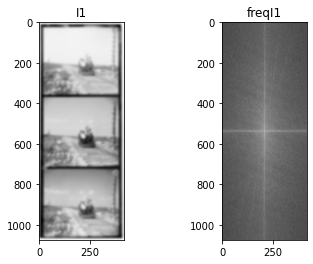

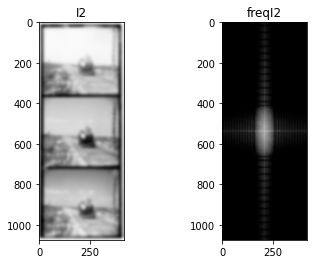

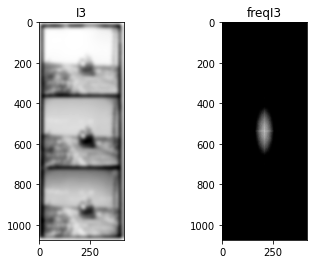

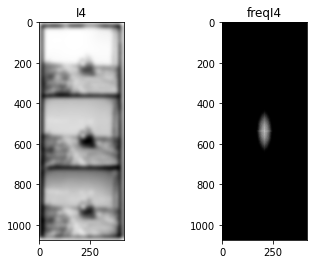

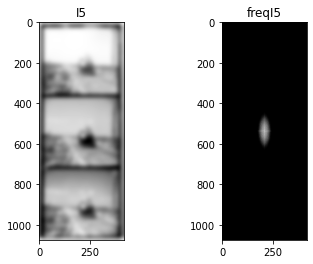

In [48]:
IA=[]
IAf=[]
for k in range(1,n):
     IA.append(PyGauss(a,s,k))
     plt.figure()
     plt.subplot(121)
     plt.title('I'+str(k))
     plt.imshow(IA[k-1],cmap='gray')
     IAf.append(PyGaussfreq(a,s,k))
     plt.subplot(122)
     plt.title('freqI'+str(k))
     plt.imshow(np.log(1 + np.abs(fp.fftshift(IAf[k-1]))),cmap='gray')

# TASK 3

In [49]:
def PyLaplas(img,sigma,n_layers):
     lmg=(pyramidGauss(img,sigma,n_layers-1)-PyGauss(img,sigma,n_layers))
     return lmg

In [50]:
def PyLaplasfreq(img,sigma,n_layers):
     lmg=(pyramidGauss(img,sigma,n_layers-1)-PyGauss(img,sigma,n_layers))
     freq_lmg = fp.fft2(lmg)
     return freq_lmg

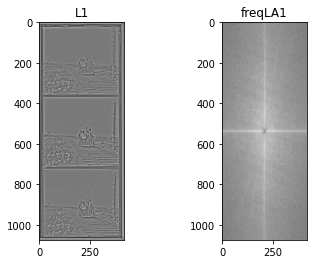

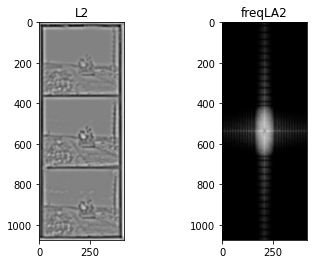

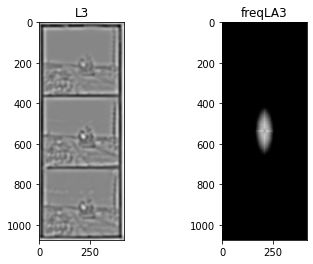

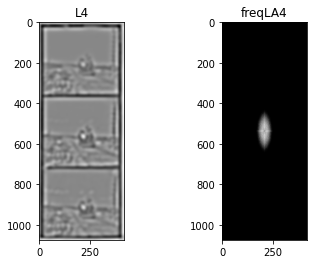

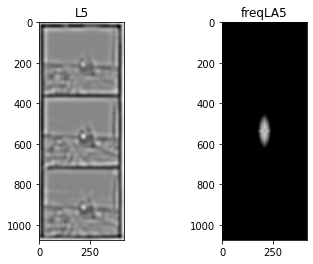

In [51]:
LA=[]
LAf=[]
for k in range(1,n):
     LA.append(pyramidLaplas(a,s,k))
     plt.figure()
     plt.subplot(121)
     plt.title('L'+str(k))
     plt.imshow(LA[k-1],cmap='gray')
     LAf.append(pyramidLaplasfreq(a,s,k))
     plt.subplot(122)
     plt.title('freqLA'+str(k))
     plt.imshow(np.log(1 + np.abs(fp.fftshift(LAf[k-1]))),cmap='gray') 